# 포트폴리오 만들기

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [70]:
#삼성전자, SK하이닉스,  삼성바이오로직스, NAVER, 현대차
stocks = ['005930', '000660', '207940', '035420','005380']

In [71]:
df = pd.DataFrame()
for s in stocks: 
    df[s] = stock.get_market_ohlcv_by_date("20170101", "20211231", s)['종가'] #약 5년간데이터
df.columns = ['삼성전자', 'SK하이닉스',  '삼성바이오로직스', 'NAVER','현대차']

In [72]:
df

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
날짜,,,,,
2017-01-02,36100,45800,154668,155620,150000
2017-01-03,36480,47250,156151,153617,153000
2017-01-04,36160,46500,152692,162230,154000
2017-01-05,35560,46950,155657,158424,153500
2017-01-06,36200,48000,155657,160026,151000
...,...,...,...,...,...
2021-12-24,80500,128000,874642,384000,215500
2021-12-27,80200,126000,875631,380500,213500
2021-12-28,80300,127500,880572,384500,214000


In [73]:
daily_ret = np.log(df/df.shift(1))        #일간수익률
annual_ret = daily_ret.mean() * 252 #연간수익률 #252는 주식시장이 여는 총 252일을 뜻한다.
daily_cov = daily_ret.cov()         #일간변동률의 공분산
annual_cov = daily_cov * 252        #연간공분산

In [74]:
annual_ret

삼성전자        0.158886
SK하이닉스      0.215660
삼성바이오로직스    0.359668
NAVER       0.182392
현대차         0.068069
dtype: float64

## 몬테카를로 시뮬레이션

In [75]:
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(20000): #총 2만회 반복
    weights = np.random.random(len(stocks)) #각 주식당 0~1사이의 가중치(W)를 랜덤하게 배정
    weights /= np.sum(weights) 
    print(weights)
    
    #log(1.02)*5 연 2%정기예금을 무위험수익으로 생각 : 0.043
    
    returns = np.dot(weights, annual_ret)-0.043 #개별 주식의 연간수익률과 가중치를 점곱 == 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) #리스크 == wCw 형태
    
    sharpe = returns / risk #샤프ratio
    
    port_ret.append(returns) #각 가중치당 포트폴리오의 리턴
    port_risk.append(risk)   #각 가중치당 포트폴리오의 리스크
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) #각 가중치당 포트폴리오의 샤프지수


[0.09848244 0.17050919 0.06312242 0.23646313 0.43142281]
[0.0160408  0.1584217  0.08180653 0.35674344 0.38698754]
[0.01810836 0.19197755 0.39467179 0.07551871 0.3197236 ]
[0.04959116 0.36270984 0.09688737 0.09514475 0.39566688]
[0.1626814  0.28823717 0.18009369 0.26945374 0.09953399]
[0.16405547 0.34671292 0.25630737 0.00638863 0.22653561]
[0.0614054  0.29994043 0.25629681 0.08606424 0.29629312]
[0.11640863 0.29029701 0.15602827 0.33761717 0.09964892]
[0.15783399 0.10435087 0.2865463  0.26064311 0.19062572]
[0.04609189 0.31814773 0.12218346 0.17184656 0.34173036]
[0.24318047 0.1735255  0.18790155 0.1621148  0.23327768]
[0.0781438  0.40497578 0.10151699 0.29534505 0.12001837]
[0.29409396 0.25843199 0.02925643 0.17778331 0.24043431]
[0.03166225 0.1132243  0.24175947 0.28298091 0.33037307]
[0.18245491 0.10074781 0.31736645 0.20476573 0.1946651 ]
[0.18996045 0.2382323  0.18236842 0.22327766 0.16616117]
[0.01986231 0.12161525 0.3041921  0.06087836 0.49345198]
[0.12080649 0.20579086 0.235963

[0.22902313 0.06662637 0.05821187 0.63971343 0.00642519]
[0.38614343 0.18588485 0.11348139 0.18013911 0.13435122]
[0.0657076  0.30041282 0.23108428 0.23806802 0.16472728]
[0.16955156 0.08928989 0.43085578 0.13512177 0.17518099]
[0.08028435 0.12351004 0.26548656 0.20031188 0.33040717]
[0.15522079 0.24616075 0.23066139 0.19937104 0.16858603]
[0.13051355 0.33984235 0.02221313 0.20392044 0.30351053]
[0.14377443 0.26040289 0.30692554 0.05514837 0.23374876]
[0.1492825  0.43433714 0.20254035 0.07595357 0.13788644]
[0.28562685 0.2611823  0.06070031 0.16219257 0.23029798]
[0.04956119 0.35722203 0.0079537  0.22340006 0.36186302]
[0.3692386  0.07208992 0.1522134  0.31176458 0.0946935 ]
[0.14578256 0.28344504 0.11422963 0.24052673 0.21601603]
[0.13270284 0.33632932 0.09868986 0.403319   0.02895899]
[0.02898268 0.04139877 0.3682706  0.3716545  0.18969345]
[0.02499896 0.34042751 0.44043368 0.08773313 0.10640672]
[0.06037709 0.25675168 0.12750024 0.1576813  0.39768969]
[0.10569402 0.08907728 0.322892

[0.27919647 0.10658939 0.32566339 0.28469887 0.00385188]
[0.293681   0.01564309 0.08107819 0.38095572 0.228642  ]
[0.17173243 0.01466419 0.1290861  0.08795108 0.5965662 ]
[0.12143619 0.38462646 0.14876899 0.33016477 0.01500359]
[0.09301479 0.1838884  0.29887541 0.24851721 0.17570418]
[0.27147967 0.53905779 0.11783246 0.05645764 0.01517244]
[0.24716297 0.21730681 0.09528169 0.15366447 0.28658405]
[0.34803618 0.03138352 0.3374972  0.09176711 0.191316  ]
[0.04329798 0.30995146 0.11211836 0.26902357 0.26560864]
[0.23265629 0.16426934 0.06279047 0.2638894  0.2763945 ]
[0.13848033 0.11823944 0.02715859 0.46937078 0.24675086]
[0.25172123 0.13927441 0.28302862 0.22758358 0.09839217]
[0.30878526 0.14896833 0.24837412 0.03804414 0.25582815]
[0.1364333  0.07651127 0.28669568 0.17384312 0.32651663]
[0.06243839 0.23535129 0.17792921 0.15430669 0.36997443]
[0.07348151 0.03001597 0.32712    0.33884304 0.23053948]
[0.02228186 0.04822732 0.34858478 0.32849637 0.25240967]
[0.23099455 0.28001286 0.123484

[0.05444103 0.10611766 0.2558202  0.16550896 0.41811214]
[0.24064969 0.18397775 0.18770842 0.18269869 0.20496544]
[0.02132488 0.26069766 0.35910112 0.29653527 0.06234108]
[0.10529933 0.1701879  0.14466721 0.26994069 0.30990488]
[0.15442526 0.40332673 0.07076861 0.03556254 0.33591686]
[0.0029918  0.25325529 0.31643423 0.10197452 0.32534417]
[0.06678237 0.20345188 0.56008036 0.09254324 0.07714215]
[0.21001992 0.17956185 0.27339032 0.19090116 0.14612675]
[0.07635231 0.09358843 0.52459114 0.05791696 0.24755116]
[0.28661185 0.15415621 0.07872598 0.24001319 0.24049277]
[0.35250271 0.01222011 0.21718582 0.24147851 0.17661285]
[0.266041   0.19709196 0.03714417 0.3720955  0.12762737]
[0.21277317 0.29207313 0.04433076 0.30846951 0.14235344]
[0.28788333 0.18673586 0.17499731 0.19384048 0.15654302]
[0.07950854 0.23574774 0.27180321 0.15360914 0.25933137]
[0.21115994 0.24403275 0.16533289 0.29101684 0.08845759]
[0.06135708 0.16111663 0.3959427  0.1476884  0.23389519]
[0.01814896 0.18043049 0.376221

[0.19889206 0.09892167 0.32044116 0.24273898 0.13900613]
[0.32667153 0.35768517 0.25806219 0.00061804 0.05696306]
[0.06137346 0.12827286 0.37733544 0.02523777 0.40778046]
[0.07105093 0.42986066 0.10450351 0.16584184 0.22874305]
[0.06997715 0.2272031  0.47895019 0.06635448 0.15751508]
[0.11559852 0.21942592 0.21433323 0.19927733 0.25136501]
[0.07165066 0.01221113 0.34760473 0.15087401 0.41765947]
[0.32303319 0.07985133 0.23669848 0.23827511 0.12214189]
[0.03709632 0.29070343 0.21893196 0.29507419 0.1581941 ]
[0.10776411 0.28050527 0.12400648 0.3356575  0.15206665]
[0.26524429 0.25357915 0.30315777 0.08101284 0.09700595]
[0.3910846  0.02675563 0.27145857 0.30772335 0.00297786]
[0.31762249 0.02467565 0.28856999 0.26906259 0.10006927]
[0.45169367 0.06060985 0.12914622 0.28399608 0.07455418]
[0.31024058 0.25188931 0.2750503  0.12474303 0.03807679]
[0.22043066 0.46879269 0.19016508 0.04237187 0.0782397 ]
[0.25814287 0.11273951 0.27842588 0.11182749 0.23886425]
[0.28348028 0.00189482 0.187009

[0.26550334 0.12335187 0.01686689 0.24671115 0.34756675]
[0.13134188 0.10834886 0.17919516 0.26774121 0.31337289]
[0.04182602 0.31662693 0.34280595 0.26066916 0.03807193]
[0.14289809 0.06621818 0.17681076 0.32354382 0.29052915]
[0.14836041 0.11399437 0.33122155 0.27628885 0.13013482]
[0.22587578 0.1882853  0.09596572 0.19381312 0.29606009]
[0.18434034 0.2330548  0.33616308 0.06362204 0.18281974]
[0.15906107 0.37700118 0.1012094  0.15961447 0.20311388]
[0.11491039 0.28271053 0.10577589 0.33449792 0.16210526]
[0.32020933 0.1293306  0.37955706 0.12073515 0.05016785]
[0.21268665 0.13529072 0.23430499 0.11654891 0.30116874]
[0.00325794 0.20261108 0.14884168 0.29316035 0.35212895]
[0.1562081  0.45011402 0.14383074 0.24309564 0.00675151]
[0.38567035 0.05411709 0.11678112 0.32256546 0.12086598]
[0.25042749 0.32672531 0.05181499 0.10662664 0.26440557]
[0.11111956 0.36449672 0.18763358 0.30365111 0.03309904]
[0.3780772  0.20333852 0.27807115 0.10521651 0.03529662]
[0.09081785 0.30101167 0.261560

[0.32495906 0.09690342 0.27179298 0.24948595 0.05685859]
[0.30603361 0.23781209 0.18087854 0.05893518 0.21634057]
[0.05125586 0.13643115 0.25444151 0.33130608 0.22656541]
[0.01491299 0.38809345 0.09852972 0.43912583 0.05933801]
[0.29932673 0.1830244  0.14265216 0.22317932 0.1518174 ]
[0.35270838 0.03965232 0.26569245 0.17394474 0.16800211]
[0.18133596 0.04941003 0.29957717 0.18573551 0.28394133]
[0.01907478 0.15729    0.50983152 0.23189209 0.0819116 ]
[0.2621158  0.04963385 0.19974009 0.29876186 0.1897484 ]
[0.24707345 0.04677115 0.12160565 0.2479876  0.33656215]
[0.03633927 0.18496259 0.28671741 0.30540548 0.18657525]
[0.22162262 0.0435515  0.36270962 0.28675901 0.08535724]
[0.01989592 0.25642755 0.36761502 0.05016889 0.30589262]
[0.13046575 0.05023612 0.12206433 0.6272351  0.06999869]
[0.26896925 0.32900934 0.01575764 0.24961568 0.1366481 ]
[0.01684038 0.11984172 0.2844794  0.32044068 0.25839782]
[0.05563043 0.26143436 0.10842046 0.20713307 0.36738169]
[0.06629254 0.1908439  0.178872

[0.20486574 0.22840835 0.25488029 0.10187898 0.20996664]
[0.13599206 0.11373073 0.31865453 0.21500996 0.21661272]
[0.04276504 0.23929055 0.24218954 0.06863892 0.40711595]
[0.18187809 0.17067233 0.16203497 0.1159234  0.36949121]
[0.32651439 0.11270501 0.18123344 0.18193075 0.19761641]
[0.25676945 0.51964525 0.01847078 0.03928156 0.16583296]
[0.13763461 0.15529316 0.01869012 0.13413518 0.55424692]
[0.28007734 0.20107875 0.30262978 0.07097552 0.14523862]
[0.07916336 0.16999174 0.3265681  0.16616039 0.25811641]
[0.03120578 0.25094017 0.2815607  0.22376321 0.21253014]
[0.12484321 0.17026416 0.29121879 0.2988526  0.11482124]
[0.03504454 0.21094013 0.22936665 0.34318004 0.18146863]
[0.01223152 0.3464598  0.09178485 0.14867153 0.4008523 ]
[0.26607516 0.10969214 0.44339308 0.02801372 0.15282589]
[0.02444514 0.35898975 0.13706241 0.25061049 0.22889221]
[0.16754394 0.15459445 0.0793024  0.31519273 0.28336649]
[0.10287713 0.22879505 0.28932683 0.07453929 0.30446169]
[0.39675694 0.18406642 0.072381

[0.14010911 0.03151718 0.36729844 0.14645837 0.3146169 ]
[0.40435944 0.09595295 0.13319314 0.0392008  0.32729367]
[0.04086235 0.14025989 0.11273675 0.33104687 0.37509414]
[0.20560025 0.26584946 0.09185712 0.25975961 0.17693356]
[0.15841762 0.13928614 0.03851672 0.38645641 0.27732311]
[0.19816741 0.13149591 0.22224727 0.21073666 0.23735275]
[0.1478683  0.25425053 0.23170585 0.25240128 0.11377404]
[0.01368089 0.26476231 0.20094993 0.2978767  0.22273017]
[0.29648488 0.18961    0.33292709 0.09802701 0.08295102]
[0.34993617 0.29985834 0.24363109 0.03424577 0.07232863]
[0.27193304 0.29038639 0.01834665 0.20930233 0.21003158]
[0.20845326 0.03012414 0.23265313 0.26750883 0.26126064]
[0.27526121 0.25488072 0.05545956 0.34220735 0.07219116]
[0.00970401 0.30094171 0.34616234 0.22357442 0.11961753]
[0.52100258 0.29859836 0.10395798 0.02768545 0.04875563]
[0.24446286 0.00857639 0.04770121 0.35811944 0.3411401 ]
[0.06653397 0.39515071 0.05005081 0.11770613 0.37055838]
[0.24295541 0.20396801 0.190254

[0.02163535 0.40599779 0.33857537 0.0455912  0.18820029]
[0.32492341 0.05465362 0.00660305 0.30348681 0.31033311]
[0.03832627 0.25976196 0.07421007 0.26568492 0.36201678]
[0.42771609 0.20616937 0.20751465 0.09325069 0.06534919]
[0.11633936 0.15784096 0.28969789 0.23529366 0.20082812]
[0.18263713 0.22406241 0.18690455 0.18813377 0.21826213]
[0.45838361 0.20452799 0.17281512 0.08280816 0.08146512]
[0.18117933 0.08668794 0.21610455 0.34079341 0.17523477]
[0.25235576 0.29818556 0.03299403 0.35633948 0.06012517]
[0.38307106 0.30665458 0.14452529 0.04113421 0.12461486]
[0.35191723 0.26440036 0.0079534  0.21440212 0.16132689]
[0.14697629 0.25373385 0.21072111 0.10185031 0.28671844]
[0.1553403  0.16890298 0.14590101 0.26826943 0.26158628]
[0.14687356 0.2654726  0.11970833 0.45903406 0.00891144]
[0.16842091 0.25366106 0.11154861 0.25392149 0.21244793]
[0.30418511 0.12110264 0.16502679 0.15671264 0.25297281]
[0.34543723 0.09948997 0.00876786 0.34873546 0.19756948]
[0.09313797 0.27217878 0.087597

[0.15622912 0.27910346 0.13836877 0.24859491 0.17770374]
[0.32583052 0.08288524 0.33992885 0.10375796 0.14759742]
[0.40605034 0.0482991  0.05693915 0.35708621 0.1316252 ]
[0.05960694 0.16307218 0.34182639 0.112814   0.32268049]
[0.0782338  0.24933917 0.16262818 0.37527246 0.13452639]
[0.17489727 0.04741932 0.26307293 0.34479075 0.16981972]
[0.02379842 0.33024324 0.03511992 0.26235041 0.34848801]
[0.2301088  0.29516814 0.04355389 0.24885753 0.18231165]
[0.2839922  0.30823759 0.24391768 0.13261871 0.03123382]
[0.19549559 0.1416602  0.25678094 0.34862466 0.05743861]
[0.20714723 0.24395631 0.17447932 0.11287922 0.26153792]
[0.11073508 0.33311558 0.10964839 0.24285078 0.20365017]
[0.1511403  0.11232624 0.32727011 0.11169039 0.29757296]
[0.18323122 0.09514887 0.11040763 0.13974492 0.47146736]
[0.13872328 0.14046497 0.30926305 0.11852804 0.29302066]
[0.00738579 0.38681543 0.23762807 0.24311459 0.12505612]
[0.16725231 0.1414849  0.32536246 0.29392259 0.07197775]
[0.25699558 0.21254756 0.273318

[0.33625625 0.05271139 0.39679195 0.20654003 0.00770038]
[0.07787028 0.28869818 0.15707337 0.22163697 0.25472121]
[0.15530438 0.06784213 0.03685599 0.56676991 0.17322758]
[0.34908304 0.02581254 0.40049531 0.21443865 0.01017046]
[0.07019563 0.14682712 0.4826535  0.12483508 0.17548868]
[0.41480939 0.23081899 0.06309372 0.03139916 0.25987874]
[0.16550627 0.30764398 0.1650273  0.1801054  0.18171704]
[0.11486203 0.24131572 0.22399978 0.24155611 0.17826637]
[0.28563171 0.26839988 0.05082452 0.22045164 0.17469226]
[0.15725603 0.02571188 0.48707202 0.1960757  0.13388438]
[0.231651   0.24020103 0.25542905 0.0116764  0.26104252]
[0.15378782 0.34026949 0.20273676 0.17443704 0.12876889]
[0.150746   0.23771197 0.2218252  0.06215173 0.32756509]
[0.14522769 0.17810396 0.18112886 0.37212342 0.12341607]
[0.13812873 0.31220769 0.16618412 0.13560419 0.24787527]
[0.19174622 0.26654655 0.05148804 0.28996357 0.20025562]
[0.15362797 0.2471855  0.31487266 0.01886198 0.26545189]
[0.30440788 0.10897203 0.055030

[0.19912804 0.31311296 0.15168802 0.20889533 0.12717565]
[0.10561376 0.17568988 0.24731956 0.18158286 0.28979393]
[0.22646742 0.2019075  0.12527258 0.23711424 0.20923826]
[0.13465405 0.19978041 0.19037395 0.23490655 0.24028504]
[0.2531691  0.22480238 0.37207313 0.10672466 0.04323073]
[0.24371367 0.13041187 0.22024909 0.17383432 0.23179105]
[0.33196607 0.00202633 0.0970368  0.36470088 0.20426993]
[0.19272801 0.09176209 0.13175839 0.5675405  0.01621101]
[0.19041923 0.04007383 0.40990368 0.14781485 0.21178841]
[0.17180868 0.20280928 0.20502987 0.25430982 0.16604236]
[0.1870426  0.07196993 0.30665588 0.33318335 0.10114824]
[0.33282223 0.32016632 0.13904217 0.16338947 0.04457982]
[0.13325692 0.4124938  0.09993617 0.33316681 0.0211463 ]
[0.13840847 0.03362782 0.49568969 0.17798882 0.1542852 ]
[0.23423426 0.2677436  0.03006998 0.16976498 0.29818718]
[0.25387679 0.2148349  0.13661978 0.17125165 0.22341688]
[0.00158059 0.1230666  0.1186228  0.50692848 0.24980153]
[0.04201359 0.28621975 0.259331

[0.03324682 0.29619592 0.1061182  0.4393935  0.12504556]
[0.28227683 0.18224503 0.00216609 0.378085   0.15522705]
[0.23920591 0.22750332 0.29908093 0.12101233 0.11319751]
[0.30590958 0.14270222 0.16298903 0.11067872 0.27772044]
[0.07297932 0.28903087 0.23935052 0.32152811 0.07711118]
[0.12295007 0.3019935  0.31360429 0.19715315 0.064299  ]
[0.1310275  0.2415632  0.25083098 0.19023124 0.18634709]
[0.03445798 0.07469615 0.30795014 0.49228676 0.09060897]
[0.32935819 0.05422415 0.0738023  0.21666489 0.32595047]
[0.26298238 0.2792443  0.32867744 0.10379904 0.02529685]
[0.1843502  0.13801867 0.45245945 0.05265405 0.17251765]
[0.29820255 0.15351628 0.20856322 0.03088647 0.30883148]
[0.21385494 0.18757045 0.06995153 0.29308833 0.23553476]
[0.17228368 0.05116145 0.10231859 0.13014489 0.54409138]
[0.0160612  0.09771748 0.43021552 0.17246902 0.28353677]
[0.26664468 0.15633853 0.2859603  0.27260488 0.0184516 ]
[0.29931877 0.214396   0.12615885 0.22364458 0.1364818 ]
[0.28050341 0.24991176 0.155444

[0.28494703 0.0074372  0.21047194 0.2773418  0.21980203]
[0.05438901 0.16565922 0.44982299 0.07388049 0.25624828]
[0.31663111 0.32155318 0.14038733 0.18192589 0.0395025 ]
[0.12866828 0.20340236 0.24058747 0.2804614  0.14688048]
[0.30579062 0.13720972 0.1793681  0.29622356 0.081408  ]
[0.31978089 0.03835896 0.15437438 0.21795884 0.26952693]
[0.1411281  0.24135103 0.21308715 0.08625043 0.31818329]
[0.32135527 0.24264433 0.07207688 0.21728245 0.14664107]
[0.11162434 0.06885672 0.4040426  0.34363894 0.0718374 ]
[0.33292592 0.15217151 0.23967444 0.10522299 0.17000513]
[0.00604995 0.34064657 0.3195183  0.22507864 0.10870655]
[0.1588868  0.11879466 0.28277423 0.14284916 0.29669515]
[0.02876813 0.34271052 0.03933008 0.3069836  0.28220768]
[0.06632633 0.13843613 0.391982   0.2841491  0.11910643]
[0.25023556 0.24604381 0.20826199 0.29048177 0.00497688]
[0.1408557  0.45547824 0.08291739 0.04138311 0.27936557]
[0.15712787 0.28047746 0.06061647 0.20444449 0.29733371]
[0.37987657 0.23377798 0.067361

[0.2293159  0.1091116  0.31541401 0.19575826 0.15040023]
[0.43845103 0.26749282 0.01845115 0.1295784  0.1460266 ]
[0.31279811 0.10718853 0.16962118 0.04758886 0.36280333]
[0.06281159 0.1039343  0.14570356 0.11268448 0.57486607]
[0.38662372 0.20781769 0.01818841 0.293984   0.09338618]
[0.2707359  0.3682461  0.26642791 0.05216228 0.04242781]
[0.29928652 0.47873316 0.1104745  0.07699875 0.03450706]
[3.03665433e-01 1.00190084e-02 3.57062263e-01 3.29129230e-01
 1.24066035e-04]
[0.27481417 0.15546284 0.14334548 0.07868177 0.34769574]
[0.2277045  0.3425647  0.26260972 0.00072905 0.16639204]
[0.24956739 0.01473993 0.26919221 0.38816993 0.07833054]
[2.11178085e-01 3.01150326e-04 4.08928012e-02 3.80301388e-01
 3.67326575e-01]
[0.19521303 0.17661721 0.185289   0.02676574 0.41611502]
[0.20242187 0.02708575 0.58783211 0.04013794 0.14252234]
[0.04304819 0.19318602 0.31250114 0.096616   0.35464864]
[0.36812771 0.020529   0.07741971 0.19318218 0.34074139]
[0.19540566 0.05966464 0.31538511 0.10883844 0

[0.24986736 0.23899269 0.02397602 0.27602012 0.21114381]
[0.11770233 0.22172897 0.32741337 0.28345941 0.04969592]
[0.33568655 0.04155983 0.24290843 0.05730255 0.32254264]
[0.11216217 0.06181402 0.4180927  0.3963323  0.01159881]
[0.20884229 0.16218978 0.06635137 0.26293464 0.29968193]
[0.13497009 0.11960302 0.16471476 0.41582587 0.16488627]
[0.24672678 0.0401497  0.22933223 0.26007628 0.223715  ]
[0.2625042  0.02587315 0.27427424 0.19773527 0.23961314]
[0.39300706 0.07661586 0.02208048 0.41676987 0.09152673]
[0.00439512 0.17517898 0.22791842 0.06399809 0.52850939]
[0.30766511 0.07591341 0.21229765 0.1191425  0.28498133]
[0.05468643 0.12687652 0.21682726 0.28058989 0.3210199 ]
[0.27627088 0.5249941  0.01293478 0.13259812 0.05320213]
[0.02531753 0.46944147 0.18038049 0.14053689 0.18432362]
[0.21063485 0.17645793 0.18888164 0.21613418 0.2078914 ]
[0.07581822 0.18190725 0.27510383 0.4263409  0.0408298 ]
[0.15960857 0.31285187 0.00072451 0.32432246 0.20249259]
[0.02675451 0.17019969 0.465768

[0.14127015 0.23533841 0.12407595 0.23607426 0.26324123]
[0.28547891 0.02718429 0.22633954 0.33070079 0.13029648]
[0.27840438 0.02326182 0.22919601 0.22967998 0.23945781]
[0.31800172 0.28363909 0.02360885 0.1918587  0.18289164]
[0.27947647 0.17519089 0.02350907 0.46219946 0.05962411]
[0.05291815 0.36056654 0.18021612 0.01838087 0.38791832]
[0.26210211 0.32151221 0.17267026 0.1592839  0.08443152]
[0.20325675 0.05146728 0.46542493 0.15921955 0.12063149]
[0.21790743 0.03315018 0.16394252 0.34530297 0.2396969 ]
[0.34220908 0.21788769 0.3101168  0.12327195 0.00651447]
[0.12411384 0.09012448 0.36360122 0.27806023 0.14410023]
[0.1104413  0.57590933 0.14499858 0.15102671 0.01762409]
[0.32664044 0.36678305 0.07339394 0.12078288 0.11239969]
[0.24360357 0.20393495 0.00422426 0.14661388 0.40162333]
[0.19649868 0.1342304  0.32849096 0.29256489 0.04821508]
[0.24056887 0.31347087 0.3492701  0.06128676 0.03540341]
[0.22564271 0.21562379 0.30701273 0.22607317 0.02564761]
[0.24556478 0.07886724 0.213407

[0.29423206 0.20991001 0.12601431 0.23871843 0.1311252 ]
[0.17495991 0.14507602 0.15018515 0.30062808 0.22915082]
[0.1020454  0.32837863 0.07140574 0.39809971 0.10007051]
[0.18342005 0.05175869 0.3531155  0.30580982 0.10589594]
[0.20540859 0.23042017 0.1825038  0.18215714 0.19951031]
[0.14263069 0.13151405 0.26230262 0.23742693 0.2261257 ]
[0.24446337 0.13384271 0.07452707 0.30506546 0.24210138]
[0.2690574  0.0562284  0.17530053 0.35204284 0.14737082]
[0.14491313 0.29150262 0.40981789 0.07531919 0.07844718]
[0.03098968 0.14774117 0.20004651 0.33919744 0.2820252 ]
[0.13126985 0.35458614 0.16951856 0.30573201 0.03889344]
[0.39734948 0.18014423 0.04702614 0.22069281 0.15478734]
[0.14131008 0.03553457 0.14495002 0.18078793 0.4974174 ]
[0.02450214 0.25568496 0.24108025 0.21318828 0.26554437]
[0.00374676 0.17942738 0.15789102 0.43532846 0.22360638]
[0.3324251  0.32399495 0.12248549 0.15842319 0.06267128]
[0.24434508 0.23529479 0.253961   0.02363236 0.24276677]
[0.40690818 0.02670056 0.006518

[0.24584395 0.18261952 0.20300228 0.21893573 0.14959852]
[0.2545478  0.12365827 0.31311101 0.27306747 0.03561546]
[0.21628346 0.28658091 0.00620959 0.16055019 0.33037585]
[0.36734555 0.46226031 0.07134953 0.04622643 0.05281819]
[0.35684461 0.0200323  0.28374093 0.16549045 0.17389171]
[0.17470276 0.27626995 0.19829135 0.08313033 0.26760561]
[0.2847264  0.13364286 0.25320764 0.16316452 0.16525859]
[0.0791007  0.15005222 0.36233183 0.3207255  0.08778975]
[0.05491461 0.1301015  0.18634732 0.3402923  0.28834428]
[0.29207053 0.01471594 0.13145248 0.48180302 0.07995804]
[0.11702365 0.20863824 0.1698602  0.18806808 0.31640983]
[0.31052927 0.16077604 0.1576443  0.22105553 0.14999486]
[0.35094156 0.2096338  0.03187196 0.38408399 0.02346869]
[0.083019   0.2272197  0.27715799 0.25520378 0.15739952]
[0.25541521 0.30718008 0.32532372 0.03843474 0.07364625]
[0.12802361 0.2383037  0.31080967 0.05370879 0.26915423]
[0.27398681 0.09855153 0.10442619 0.36251024 0.16052524]
[0.36455175 0.13916855 0.362076

[0.39299527 0.21766949 0.11768947 0.02222362 0.24942215]
[0.22406511 0.37735376 0.02751946 0.13414248 0.23691919]
[0.02442986 0.34471223 0.24390338 0.32078221 0.06617232]
[0.10458524 0.47765038 0.06396623 0.31142948 0.04236868]
[0.28073931 0.49777915 0.00609092 0.11016711 0.10522351]
[0.27942275 0.28587976 0.14144718 0.03829604 0.25495427]
[0.02695286 0.31908911 0.33881964 0.01125551 0.30388288]
[0.17327072 0.06219494 0.29889723 0.32115758 0.14447952]
[0.17899589 0.26649019 0.19410778 0.22250222 0.13790391]
[0.22193989 0.26544356 0.12593235 0.1844938  0.20219041]
[0.15037658 0.38632108 0.07615201 0.02168522 0.3654651 ]
[0.03215191 0.21126279 0.13297984 0.12051161 0.50309386]
[0.0409624  0.1446888  0.32282407 0.19482018 0.29670456]
[0.02273655 0.32440331 0.38189687 0.05253648 0.21842679]
[0.23122662 0.1164228  0.17313154 0.18647373 0.29274531]
[0.36379983 0.26613185 0.1482532  0.17819171 0.04362341]
[0.28612598 0.34036001 0.27784438 0.09207028 0.00359935]
[0.01910416 0.61830582 0.006165

[0.005899   0.27339583 0.21951093 0.29064695 0.21054729]
[0.38634426 0.39126776 0.04269448 0.10151785 0.07817565]
[0.29301084 0.24811431 0.24870168 0.09434059 0.11583258]
[0.18976775 0.07239357 0.24009703 0.25786878 0.23987288]
[0.06283472 0.19843665 0.24484144 0.21183079 0.28205641]
[0.15554823 0.28571003 0.25872232 0.07550125 0.22451817]
[0.46757391 0.07845856 0.13544405 0.27042982 0.04809366]
[0.14309347 0.21513969 0.17671951 0.25379263 0.21125469]
[0.34815354 0.21822585 0.01830715 0.38819617 0.02711729]
[0.05859434 0.43203557 0.38494103 0.02038849 0.10404057]
[0.01038335 0.04829059 0.24398311 0.39056757 0.30677539]
[0.33045214 0.29816001 0.22302643 0.13570132 0.0126601 ]
[0.09989438 0.01246349 0.23032666 0.30921245 0.34810302]
[0.15420477 0.02069922 0.29635648 0.11829602 0.41044352]
[0.00042831 0.30125413 0.25026528 0.36593185 0.08212042]
[0.16742421 0.26032215 0.20058741 0.29420985 0.07745638]
[0.32705459 0.33086173 0.29552979 0.01769725 0.02885664]
[0.26681501 0.29173897 0.229487

[0.09580139 0.10589455 0.0788818  0.34529422 0.37412804]
[0.24696109 0.15238971 0.23455743 0.19539073 0.17070105]
[0.29973846 0.07374491 0.17415853 0.24059239 0.21176572]
[0.29572428 0.26780484 0.14259501 0.286654   0.00722188]
[0.09321192 0.130695   0.10326573 0.37024642 0.30258094]
[0.15211656 0.2927718  0.00037205 0.30397101 0.25076859]
[0.27732601 0.07173908 0.19749093 0.1970184  0.25642558]
[0.18664561 0.10860432 0.03840453 0.34840869 0.31793685]
[0.23654757 0.18086994 0.24880227 0.31995918 0.01382105]
[0.06501954 0.17581382 0.21805512 0.3056075  0.23550402]
[0.11846861 0.30905726 0.29487736 0.12952321 0.14807356]
[0.14590549 0.22856123 0.25255693 0.258365   0.11461134]
[0.33654536 0.04313919 0.1439598  0.12661193 0.34974372]
[0.25215955 0.08822998 0.15626686 0.03299936 0.47034425]
[0.06411312 0.52606041 0.06104529 0.24738524 0.10139593]
[0.08034349 0.17282268 0.12334115 0.49045956 0.13303313]
[0.10480635 0.17512937 0.30514187 0.23969731 0.1752251 ]
[0.22452595 0.07928066 0.176990

[0.44205934 0.18331384 0.17942548 0.06464389 0.13055746]
[0.11342394 0.1472312  0.26173679 0.0746185  0.40298957]
[0.36365815 0.01513546 0.05288821 0.23616185 0.33215632]
[0.21657516 0.38675795 0.1117697  0.20337419 0.081523  ]
[0.25150724 0.13798425 0.28797593 0.0329954  0.28953718]
[0.07753051 0.0388745  0.36162472 0.28384395 0.23812632]
[0.01604655 0.00694798 0.21072011 0.3608879  0.40539746]
[0.13661149 0.34510161 0.17430885 0.15246128 0.19151677]
[0.21059281 0.04016422 0.39146533 0.07713063 0.280647  ]
[0.13853364 0.22346634 0.40876564 0.21550494 0.01372943]
[0.52549673 0.02704607 0.03365516 0.39969188 0.01411016]
[0.01917095 0.10262974 0.3851065  0.12354869 0.36954413]
[0.0427427  0.14067168 0.26521638 0.16193876 0.38943048]
[0.16455676 0.13394298 0.18139639 0.26321547 0.2568884 ]
[0.19414071 0.15677006 0.35901363 0.09837868 0.19169692]
[0.23868119 0.30435133 0.34381974 0.01739672 0.09575102]
[0.2086403  0.25338193 0.48151437 0.0391844  0.017279  ]
[0.30778998 0.20838518 0.019206

In [76]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df.columns = ['Returns','Risk', 'Sharpe','삼성전자', 'SK하이닉스',  '삼성바이오로직스', 'NAVER','현대차']
df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
0,0.104618,0.233612,0.447828,0.098482,0.170509,0.063122,0.236463,0.431423
1,0.114546,0.235610,0.486168,0.016041,0.158422,0.081807,0.356743,0.386988
2,0.178767,0.256577,0.696739,0.018108,0.191978,0.394672,0.075519,0.319724
3,0.122235,0.244604,0.499724,0.049591,0.362710,0.096887,0.095145,0.395667
4,0.165704,0.228905,0.723901,0.162681,0.288237,0.180094,0.269454,0.099534


## Efficient Frontier

c:\users\82108\.conda\envs\kaggle\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


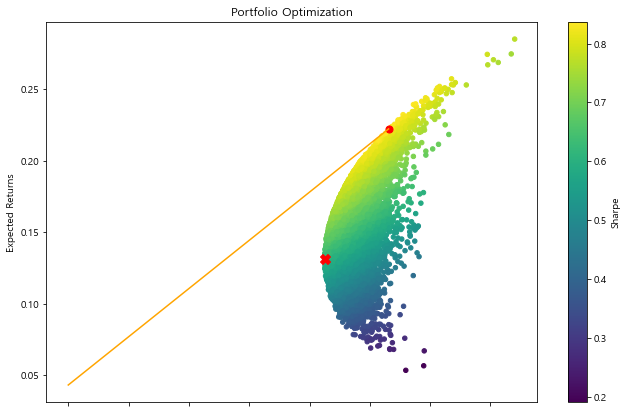

In [80]:

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

# plot

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap = 'viridis', figsize = (11,7))
plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'], c = 'r',  s=50)
plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'], c = 'r', marker = 'X', s=100)

plt.plot([0, max_sharpe['Risk']], [0.043, max_sharpe['Returns']],color="orange")

plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [82]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
10036,0.222301,0.26555,0.837133,0.140041,0.232762,0.446466,0.17469,0.006041


## 주식 종목의 수가 늘어난다면?

In [83]:
df = pd.DataFrame()
for s in stocks: 
    df[s] = stock.get_market_ohlcv_by_date("20170101", "20211231", s)['종가'] #약 5년간데이터
df.columns = ['삼성전자', 'SK하이닉스',  '삼성바이오로직스', 'NAVER','현대차']

In [84]:
daily_ret = np.log(df/df.shift(1))        #일간수익률
annual_ret = daily_ret.mean() * 252 #연간수익률 #252는 주식시장이 여는 총 252일을 뜻한다.

df = daily_ret

In [85]:
df = df.dropna()

In [86]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):
    
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca

num_factor_exposures=3
svd_solver='full'

pca = fit_pca(df, num_factor_exposures, svd_solver)

3개의 Risk Factor에 의해 설명되는 데이터의 분산 : 81.82773964287495%


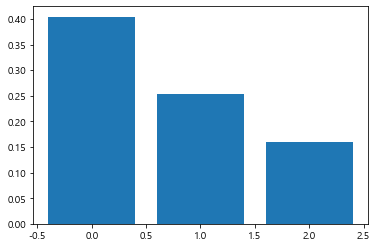

In [87]:
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_);
print(f'{num_factor_exposures}개의 Risk Factor에 의해 설명되는 데이터의 분산 : {sum(pca.explained_variance_ratio_)*100}%')

In [88]:
factor_L = pd.DataFrame(pca.components_.T, index=df.columns, columns=np.arange(num_factor_exposures))
factor_L

,0,1,2
삼성전자,0.350974,0.278114,-0.191055
SK하이닉스,0.494274,0.477693,-0.543180
삼성바이오로직스,0.620686,-0.776530,-0.087531
NAVER,0.341238,0.167772,0.381912
현대차,0.361685,0.251626,0.717589


In [89]:
factor_F = pd.DataFrame(pca.transform(df), index=df.index, columns=np.arange(num_factor_exposures))
factor_F

,0,1,2
날짜,,,
2017-01-03,0.025871,0.013535,-0.010263
2017-01-04,-0.005808,0.018428,0.038084
2017-01-05,-0.000327,-0.019454,-0.014878
2017-01-06,0.012812,0.013417,-0.023123
2017-01-09,0.001801,0.033092,-0.032708
...,...,...,...
2021-12-24,0.011469,0.024227,0.025758
2021-12-27,-0.016765,-0.012986,-0.000779
2021-12-28,0.012319,0.004308,-0.001246


In [90]:
common_returns = pd.DataFrame(np.dot(factor_F, factor_L.T), index=df.index, columns=df.columns)
specific_returns = df - common_returns

# diagonal을 취하는 이유 -> 행렬 계산을 위해
idiosyncratic_var_matrix = pd.DataFrame(np.diag(np.var(specific_returns)), index=df.columns, columns=df.columns)
idiosyncratic_var_matrix

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
삼성전자,0.000083,0.000000,0.000000,0.000000,0.000000
SK하이닉스,0.000000,0.000027,0.000000,0.000000,0.000000
삼성바이오로직스,0.000000,0.000000,0.000001,0.000000,0.000000
NAVER,0.000000,0.000000,0.000000,0.000242,0.000000
현대차,0.000000,0.000000,0.000000,0.000000,0.000097


In [91]:
factor_covariance_matrix = np.cov(factor_F.T)
factor_covariance_matrix

array([[ 1.00286582e-03,  6.35499757e-19, -3.42491249e-19],
       [ 6.35499757e-19,  6.29734650e-04,  1.14870646e-19],
       [-3.42491249e-19,  1.14870646e-19,  3.96910848e-04]])

In [92]:
L = factor_beta
F = factor_covariance_matrix
S = idiosyncratic_var_matrix

portfolio_covariance = L.dot(F).dot(L.T) + S
portfolio_covariance

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
삼성전자,0.000269,0.000299,0.000089,0.000121,0.000117
SK하이닉스,0.000299,0.000532,0.000093,0.000137,0.000100
삼성바이오로직스,0.000089,0.000093,0.000770,0.000117,0.000077
NAVER,0.000121,0.000137,0.000117,0.000435,0.000259
현대차,0.000117,0.000100,0.000077,0.000259,0.000473


In [93]:
daily_cov = portfolio_covariance        #일간변동률의 공분산
annual_cov = daily_cov * 252        #연간공분산

In [94]:
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(20000): #총 2만회 반복
    weights = np.random.random(len(stocks)) #각 주식당 0~1사이의 가중치(W)를 랜덤하게 배정
    weights /= np.sum(weights) 
    print(weights)
    
    #log(1.02)*5 연 2%정기예금을 무위험수익으로 생각 : 0.043
    
    returns = np.dot(weights, annual_ret)-0.043 #개별 주식의 연간수익률과 가중치를 점곱 == 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) #리스크 == wCw 형태
    
    sharpe = returns / risk #샤프ratio
    
    port_ret.append(returns) #각 가중치당 포트폴리오의 리턴
    port_risk.append(risk)   #각 가중치당 포트폴리오의 리스크
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) #각 가중치당 포트폴리오의 샤프지수

    


[0.31056435 0.271708   0.16294872 0.0957001  0.15907884]
[0.29894735 0.2511698  0.25278248 0.00261464 0.19448574]
[0.36542828 0.01156634 0.13356808 0.29705769 0.19237961]
[0.28971336 0.10264751 0.229285   0.19114719 0.18720693]
[0.30312431 0.11508139 0.28026949 0.22346788 0.07805693]
[0.31286674 0.01290388 0.37439505 0.03317625 0.26665808]
[0.27325964 0.08311233 0.05520951 0.29583297 0.29258555]
[0.00674264 0.31680202 0.30524298 0.32512071 0.04609164]
[0.23549686 0.05273714 0.24884155 0.22111669 0.24180776]
[0.30726553 0.29729718 0.02569532 0.34214401 0.02759796]
[0.21894858 0.20449917 0.17463291 0.20938321 0.19253614]
[0.10582493 0.18959325 0.51828643 0.14437858 0.0419168 ]
[0.147267   0.22003295 0.24483484 0.20130936 0.18655585]
[0.30841979 0.01082423 0.34200897 0.26895433 0.06979269]
[0.07698044 0.19294883 0.26523523 0.23929493 0.22554057]
[0.29484194 0.11562115 0.37345188 0.17037097 0.04571406]
[0.34695751 0.01573152 0.17142092 0.00139872 0.46449133]
[0.01446773 0.11817979 0.425763

[0.19742407 0.15374637 0.1927168  0.23593789 0.22017487]
[0.02618782 0.13900904 0.51625292 0.29410012 0.02445009]
[0.28009634 0.34105769 0.25314946 0.0729143  0.05278221]
[0.43755593 0.07754105 0.28379031 0.14008861 0.0610241 ]
[0.04259693 0.05923826 0.22927625 0.27864571 0.39024285]
[0.29400695 0.11043231 0.32663139 0.010616   0.25831336]
[0.07201139 0.29261834 0.31936908 0.06705729 0.2489439 ]
[0.09060174 0.23647124 0.29520337 0.24890286 0.12882079]
[0.37288847 0.27282084 0.07340952 0.17466432 0.10621685]
[0.45094973 0.08744315 0.05318748 0.21185459 0.19656505]
[0.03026912 0.14792316 0.3070126  0.2890573  0.22573782]
[0.33453893 0.3011755  0.31861185 0.0148168  0.03085693]
[0.26913247 0.31873342 0.00402676 0.29758687 0.11052048]
[0.06685497 0.09672182 0.15163895 0.42020477 0.26457948]
[0.10614949 0.19921745 0.26952334 0.14901579 0.27609393]
[0.06232237 0.24774029 0.33276983 0.13410933 0.22305818]
[0.43296569 0.08880081 0.22994888 0.12527248 0.12301214]
[0.37544727 0.32872085 0.038004

[0.42250677 0.22125084 0.18368581 0.16075508 0.0118015 ]
[0.04416225 0.09516883 0.29098506 0.13057289 0.43911096]
[0.39292859 0.01519173 0.08537276 0.31756212 0.18894481]
[0.0620065  0.03401897 0.3613877  0.35392157 0.18866525]
[0.25128766 0.20084347 0.2006164  0.24694121 0.10031125]
[0.03172985 0.28569346 0.10140291 0.37657492 0.20459886]
[0.09894029 0.26621027 0.28340017 0.05356843 0.29788084]
[0.3817395  0.0077868  0.16647228 0.16233359 0.28166782]
[0.18018715 0.20563443 0.1864876  0.10834911 0.31934171]
[0.22908179 0.00944756 0.00618039 0.4427171  0.31257316]
[0.19176888 0.21424745 0.05507611 0.51348552 0.02542204]
[0.23483576 0.04036778 0.07640746 0.24478424 0.40360475]
[0.20709991 0.04302774 0.23692312 0.20006368 0.31288555]
[0.33504649 0.22472314 0.00949473 0.157338   0.27339764]
[0.3134843  0.14144179 0.09157792 0.14760525 0.30589074]
[0.27398316 0.1049585  0.27966026 0.18587208 0.155526  ]
[0.09249455 0.16927535 0.18516066 0.32447011 0.22859933]
[0.04905579 0.04513173 0.345464

[0.29044751 0.03232541 0.18890147 0.41268566 0.07563995]
[4.78312073e-02 3.18341972e-01 4.66764642e-01 4.12128882e-05
 1.67020965e-01]
[0.14060436 0.10910845 0.16414962 0.27606473 0.31007284]
[0.00887941 0.25211355 0.55161798 0.09718119 0.09020787]
[0.1292563  0.04188248 0.26815524 0.30846092 0.25224506]
[0.04844554 0.25688017 0.14229296 0.03278377 0.51959756]
[0.28794561 0.35138647 0.12109307 0.09512746 0.1444474 ]
[0.05801928 0.17266254 0.07217086 0.17394926 0.52319806]
[0.25527284 0.22652231 0.09791231 0.19731415 0.22297839]
[0.42666944 0.03944968 0.07414484 0.10101656 0.35871948]
[0.16181903 0.24857997 0.16478884 0.29075608 0.13405607]
[0.15228378 0.24482359 0.08016224 0.06909301 0.45363738]
[0.19909024 0.25186422 0.24067568 0.02435117 0.2840187 ]
[0.23320744 0.15239518 0.24663707 0.05002847 0.31773185]
[0.18332198 0.13893819 0.31272582 0.00141788 0.36359612]
[0.01508189 0.12947992 0.30405185 0.28378654 0.26759981]
[0.12406092 0.01356547 0.30046531 0.09831668 0.46359162]
[0.1630194

[0.3295941  0.37728936 0.01996911 0.26442137 0.00872606]
[0.41537946 0.06062299 0.11862771 0.07565352 0.32971632]
[0.20542336 0.0184946  0.44793203 0.30516632 0.02298368]
[0.01486844 0.42667294 0.24321677 0.29561113 0.01963072]
[0.20371513 0.06832569 0.18198117 0.35578289 0.19019512]
[0.07742571 0.45026616 0.08824931 0.02703727 0.35702155]
[0.2156918  0.25846131 0.18732804 0.27761378 0.06090507]
[0.21694376 0.20645585 0.26351469 0.03334893 0.27973677]
[0.33199521 0.08799012 0.26257112 0.19931409 0.11812947]
[0.00082653 0.25288182 0.34500619 0.19469845 0.20658702]
[0.23936098 0.05184034 0.04478419 0.27048287 0.39353162]
[0.30397305 0.02888874 0.12345665 0.13060288 0.41307868]
[0.20772744 0.14951598 0.00619908 0.49462401 0.1419335 ]
[0.05446569 0.04800177 0.39127942 0.00579387 0.50045925]
[0.09902617 0.10341516 0.32127498 0.31038257 0.16590113]
[0.16529024 0.10570177 0.12605546 0.20106566 0.40188687]
[0.06211308 0.19664075 0.14276322 0.23559861 0.36288434]
[0.33971877 0.02651342 0.181584

[0.32063144 0.39337322 0.06100354 0.00166906 0.22332274]
[0.10210292 0.08431388 0.07379209 0.29328946 0.44650165]
[0.08455679 0.05681018 0.32968722 0.14646233 0.38248348]
[0.06994456 0.34097364 0.33782245 0.05401245 0.1972469 ]
[0.34454439 0.3758968  0.23605678 0.04255728 0.00094475]
[0.11646261 0.25715918 0.12909597 0.08714333 0.41013891]
[0.08874081 0.26939663 0.15969107 0.14592811 0.33624338]
[0.33340884 0.09649101 0.44681593 0.00396406 0.11932016]
[0.32558958 0.11237203 0.32747135 0.10794653 0.12662051]
[0.28590391 0.22179451 0.06990944 0.1968793  0.22551284]
[0.04644891 0.29433965 0.1767946  0.32202851 0.16038833]
[0.04616369 0.46117251 0.13807312 0.07962478 0.27496591]
[0.09922108 0.16860629 0.24261935 0.21852377 0.2710295 ]
[0.02058294 0.15979661 0.46308408 0.04421523 0.31232114]
[0.1016629  0.33866293 0.13098997 0.2156553  0.2130289 ]
[0.13513842 0.20183948 0.15107983 0.16093987 0.35100241]
[0.18266239 0.20687047 0.11503154 0.24018532 0.25525028]
[0.2005224  0.21169799 0.129414

[0.1578875  0.34914256 0.00497296 0.32768352 0.16031346]
[0.25690053 0.04169475 0.35291008 0.3307538  0.01774084]
[0.20319417 0.12035092 0.27853731 0.05274339 0.34517421]
[0.13341685 0.00766851 0.41122415 0.25765043 0.19004005]
[0.01458231 0.33299673 0.1881435  0.24121514 0.22306232]
[0.11654398 0.27100735 0.29097662 0.07312863 0.24834341]
[0.2015827  0.09641046 0.25821638 0.22760504 0.21618541]
[0.04334424 0.27570923 0.30729417 0.22086844 0.15278392]
[0.11932458 0.35953549 0.23313847 0.00218838 0.28581307]
[0.28040399 0.2094558  0.16162345 0.28550006 0.06301669]
[0.0658144  0.30651959 0.30309237 0.19948805 0.12508559]
[0.52569443 0.03501706 0.30612279 0.0737787  0.05938702]
[0.21568894 0.26285094 0.07245105 0.06813248 0.38087659]
[0.17869395 0.0908896  0.1632185  0.22167208 0.34552586]
[0.32087094 0.20188485 0.05502138 0.04153379 0.38068905]
[0.09173105 0.15285191 0.21108622 0.12481075 0.41952007]
[0.05505979 0.46085504 0.20946604 0.15274657 0.12187256]
[0.20081133 0.18711011 0.079753

[0.28866762 0.27647312 0.26517288 0.13900777 0.03067861]
[0.16816019 0.16818529 0.26702503 0.23384834 0.16278115]
[0.41029777 0.05775648 0.33628939 0.01932321 0.17633315]
[0.22436476 0.0125042  0.25172585 0.31250106 0.19890413]
[0.33671322 0.28631841 0.03716618 0.01027782 0.32952437]
[0.087072   0.02191524 0.36876745 0.27926133 0.24298398]
[1.79885165e-04 3.26435593e-01 3.13415531e-01 2.12687732e-01
 1.47281259e-01]
[0.10017397 0.33227499 0.10257807 0.3904451  0.07452787]
[0.09012637 0.05749998 0.31523673 0.42715595 0.10998096]
[0.27667783 0.15070043 0.27271952 0.10469128 0.19521094]
[0.25289255 0.28994508 0.24476396 0.08538146 0.12701695]
[0.14095632 0.22111943 0.10890423 0.30326246 0.22575756]
[0.32650997 0.28585507 0.14016976 0.06347674 0.18398846]
[0.23566262 0.29843296 0.08550769 0.20894314 0.17145358]
[0.08963015 0.23986021 0.44207002 0.16156447 0.06687514]
[0.11160342 0.32969843 0.24455476 0.23584074 0.07830266]
[0.0653542  0.03919375 0.37980175 0.42340358 0.09224672]
[0.1592914

[0.11186508 0.07431395 0.20757995 0.41895181 0.18728921]
[0.2457135  0.22238323 0.0417547  0.15971339 0.33043518]
[0.04439249 0.1793076  0.3687631  0.25962256 0.14791426]
[0.11967012 0.01310108 0.14616995 0.45967714 0.26138171]
[0.22356994 0.11165531 0.09333597 0.19469751 0.37674128]
[0.03583137 0.25266045 0.33065623 0.35105031 0.02980162]
[0.39873198 0.15991936 0.13503895 0.10670065 0.19960906]
[0.30900427 0.10079937 0.03109525 0.26981202 0.28928908]
[0.24708176 0.21404742 0.21663775 0.0861484  0.23608467]
[0.10515009 0.13146416 0.49486645 0.1846735  0.0838458 ]
[0.07144137 0.2484143  0.11408286 0.18063122 0.38543025]
[0.18918868 0.34179143 0.34853115 0.00619842 0.1142903 ]
[0.11792808 0.3341098  0.21863724 0.28986068 0.03946419]
[0.13879947 0.18540999 0.25408625 0.14740145 0.27430284]
[0.25993303 0.35762162 0.03143098 0.03704271 0.31397166]
[0.17545557 0.06531514 0.21030832 0.17824048 0.37068048]
[0.03933992 0.21574794 0.13827245 0.15656745 0.45007224]
[0.08724495 0.52238531 0.122497

[0.28607585 0.29227488 0.15888784 0.13979492 0.12296651]
[0.01445032 0.19614466 0.03694896 0.40654072 0.34591534]
[0.23852216 0.31091513 0.05204113 0.29660523 0.10191635]
[0.34800079 0.04571832 0.03613765 0.14068087 0.42946237]
[0.11795889 0.14298162 0.3190759  0.31709581 0.10288777]
[0.30549652 0.28558498 0.19334634 0.20076077 0.01481138]
[0.09169821 0.37851143 0.2012557  0.25193646 0.0765982 ]
[0.29642033 0.13776787 0.04132994 0.32257044 0.20191142]
[0.17408234 0.29668009 0.20096028 0.08007231 0.24820499]
[0.24679982 0.05999035 0.07579704 0.56983574 0.04757706]
[0.13541395 0.23430238 0.22739376 0.17911476 0.22377515]
[0.19239709 0.20369216 0.42970073 0.01993819 0.15427183]
[0.18681795 0.0384926  0.33282649 0.21487728 0.22698567]
[0.19687183 0.3056729  0.17110911 0.2015656  0.12478056]
[0.37213997 0.29314972 0.11789447 0.09776783 0.119048  ]
[0.08604604 0.0564813  0.2440489  0.25175038 0.36167338]
[0.17858264 0.1312794  0.13258269 0.25302325 0.30453202]
[0.14498076 0.1694273  0.178286

[0.10099258 0.08408343 0.47579879 0.04241001 0.29671519]
[0.11014233 0.20853288 0.26051237 0.20109415 0.21971828]
[0.24724832 0.26262799 0.11143042 0.13022135 0.24847192]
[0.41591518 0.15669404 0.33003446 0.08068834 0.01666798]
[0.20804063 0.24755519 0.20507565 0.15110688 0.18822165]
[0.15053341 0.2468587  0.18155159 0.23952909 0.1815272 ]
[0.20194494 0.19755764 0.271999   0.15036424 0.17813418]
[0.39458883 0.16427933 0.15702712 0.01796928 0.26613545]
[0.09066728 0.25508077 0.14734749 0.17446457 0.33243989]
[0.29799827 0.23761188 0.14161538 0.20767897 0.1150955 ]
[0.25582344 0.18483067 0.1132271  0.05028325 0.39583554]
[0.06490598 0.20081229 0.30527574 0.27648718 0.1525188 ]
[0.06758607 0.31749262 0.29725734 0.31415716 0.00350681]
[0.22606063 0.21975768 0.28826282 0.05278663 0.21313224]
[0.4773415  0.17622629 0.09509556 0.15889371 0.09244294]
[0.26452914 0.41231454 0.11175497 0.18189938 0.02950196]
[0.27243011 0.04235387 0.17765993 0.18014887 0.32740722]
[0.24735106 0.01084107 0.396491

[0.16205424 0.05914413 0.49751236 0.00966109 0.27162819]
[0.14696083 0.19741003 0.19514226 0.2213612  0.23912568]
[0.1223587  0.29015555 0.38326521 0.0699254  0.13429514]
[0.03750829 0.03531859 0.15513659 0.29624854 0.47578799]
[0.20030268 0.03023495 0.09626065 0.13474728 0.53845444]
[0.34347818 0.08234354 0.08836699 0.10910198 0.37670931]
[0.26115444 0.22464157 0.23464814 0.20578667 0.07376918]
[0.35344707 0.09078557 0.18399185 0.02832742 0.34344808]
[0.26215008 0.24775984 0.13851893 0.09753017 0.25404098]
[0.49808208 0.23731575 0.088176   0.03920597 0.1372202 ]
[0.4439554  0.21879764 0.06270145 0.24578042 0.0287651 ]
[0.11891366 0.42562055 0.29916103 0.101219   0.05508575]
[0.07351809 0.10492239 0.34454875 0.13011959 0.34689117]
[0.16438419 0.16578395 0.20834622 0.20457028 0.25691537]
[0.33106549 0.01149924 0.26940803 0.18485528 0.20317195]
[0.04591235 0.05324461 0.33098993 0.16158021 0.40827289]
[0.28372559 0.07152342 0.10650183 0.3706729  0.16757625]
[0.37118125 0.29019401 0.013188

[0.0867557  0.31215289 0.359356   0.04224098 0.19949443]
[0.27195075 0.01739921 0.14314172 0.3081393  0.25936902]
[0.15400676 0.25508387 0.15013563 0.18035978 0.26041396]
[0.19207255 0.1408507  0.19824415 0.28078761 0.18804499]
[0.16406245 0.29935892 0.34421788 0.13104726 0.06131348]
[0.08641713 0.28673629 0.06286385 0.16026301 0.40371972]
[0.06077171 0.21602961 0.07194459 0.54036019 0.11089391]
[0.26766452 0.23376222 0.00138896 0.22182959 0.2753547 ]
[0.43724551 0.06546002 0.02554972 0.01583386 0.45591089]
[0.45783407 0.24859193 0.12842755 0.12611758 0.03902887]
[0.11215948 0.16387385 0.05296631 0.273497   0.39750337]
[0.22960315 0.17274527 0.04398294 0.30908819 0.24458044]
[0.23709853 0.05670821 0.32333682 0.16942315 0.21343329]
[0.26755959 0.07544434 0.05063811 0.38735791 0.21900005]
[0.14444447 0.37044155 0.06482512 0.05393387 0.36635498]
[0.39351249 0.11431906 0.08392178 0.09125805 0.31698862]
[0.36645002 0.05868545 0.17415212 0.02207257 0.37863982]
[0.39203085 0.21939366 0.041670

[0.33099042 0.33396244 0.02278063 0.02173886 0.29052765]
[0.41200015 0.24602552 0.12528157 0.11598715 0.10070561]
[0.13426627 0.0838572  0.2392641  0.17595664 0.3666558 ]
[0.05879633 0.12308061 0.17086889 0.36686284 0.28039133]
[0.22129233 0.18065813 0.21289375 0.14113457 0.24402122]
[0.24689315 0.03143598 0.16438743 0.42541412 0.13186932]
[0.24299447 0.20129716 0.238603   0.29280531 0.02430006]
[0.67406027 0.08824559 0.00394607 0.18227256 0.05147551]
[0.1946023  0.1442417  0.36402148 0.10403632 0.1930982 ]
[0.35693467 0.14286827 0.053193   0.44487705 0.00212701]
[0.06855601 0.2275447  0.35818978 0.15997155 0.18573796]
[0.22801427 0.29683121 0.1236471  0.26606051 0.08544692]
[0.23312208 0.25160276 0.24899263 0.1506095  0.11567304]
[0.28361915 0.18214321 0.09329382 0.22397432 0.2169695 ]
[0.29744385 0.15466638 0.01702057 0.23132602 0.29954318]
[0.09407274 0.12975895 0.17305521 0.16578532 0.43732777]
[0.38487505 0.28229065 0.18081855 0.10098067 0.05103507]
[0.17431165 0.08733242 0.160787

[0.01193727 0.18299014 0.03140198 0.11556067 0.65810995]
[0.02571207 0.0408844  0.68333278 0.02061259 0.22945816]
[0.05869326 0.01553404 0.34607347 0.21846197 0.36123725]
[0.22434419 0.16781285 0.219626   0.29452033 0.09369663]
[0.15708591 0.17853599 0.2887268  0.25821821 0.11743309]
[0.32008775 0.14286325 0.35082812 0.12873451 0.05748638]
[0.24173845 0.17767952 0.19841702 0.29309506 0.08906995]
[0.32774851 0.26008976 0.18926355 0.07231799 0.15058019]
[0.27368433 0.25975246 0.22137891 0.19723708 0.04794723]
[0.16513469 0.26522456 0.55261648 0.00705911 0.00996517]
[0.13560788 0.06673018 0.29780767 0.24606592 0.25378835]
[0.21790864 0.30021968 0.20040672 0.12412308 0.15734188]
[0.28638137 0.28582597 0.23008731 0.08798949 0.10971585]
[0.27357763 0.15774277 0.26090396 0.25177242 0.05600323]
[0.04916328 0.03505421 0.18961082 0.44861948 0.27755222]
[0.24010632 0.16866724 0.08307758 0.19908294 0.30906591]
[0.01341401 0.44993389 0.06284143 0.35644142 0.11736925]
[0.15920176 0.23131231 0.160943

[0.31174073 0.02671306 0.0528924  0.1856267  0.42302712]
[0.27987167 0.06959268 0.26810395 0.22855146 0.15388024]
[0.12029146 0.38029295 0.30727783 0.1916002  0.00053756]
[0.04577416 0.02554055 0.51700349 0.38571347 0.02596833]
[0.09330525 0.3409661  0.15821357 0.317107   0.09040808]
[0.25902422 0.03501641 0.07305861 0.35651738 0.27638338]
[0.03457885 0.14951458 0.27304968 0.20553107 0.33732582]
[0.08331722 0.02760874 0.28400522 0.09745015 0.50761868]
[0.30602198 0.17646612 0.4404685  0.02928647 0.04775693]
[0.32923928 0.23448993 0.05647622 0.04198294 0.33781163]
[0.07864328 0.30556691 0.36389124 0.12618955 0.12570901]
[0.18684987 0.1263524  0.26140452 0.15282026 0.27257294]
[0.15899637 0.10203767 0.15186085 0.27062695 0.31647815]
[0.28937367 0.25266009 0.12138406 0.12941296 0.20716922]
[0.23221424 0.33240208 0.22491928 0.13137908 0.07908532]
[0.08163104 0.57342438 0.13737114 0.199093   0.00848044]
[0.03337033 0.2786202  0.08437794 0.20219429 0.40143724]
[0.43683458 0.01599818 0.074984

[0.22869059 0.38073259 0.08782313 0.04007997 0.26267372]
[0.14195322 0.2273605  0.13984289 0.2819417  0.20890168]
[0.26503863 0.14743062 0.07117616 0.3286507  0.18770389]
[0.12956987 0.40376915 0.11225977 0.03600605 0.31839515]
[0.45297872 0.05964073 0.20141321 0.00442799 0.28153935]
[0.13693858 0.05312623 0.36524287 0.39483706 0.04985526]
[0.18058765 0.19881209 0.17153041 0.27206867 0.17700117]
[0.24089068 0.1515512  0.11662131 0.29195308 0.19898374]
[0.18384694 0.35320894 0.04685174 0.02156321 0.39452918]
[0.14785738 0.34437816 0.13980351 0.23580973 0.13215122]
[0.25077372 0.25716434 0.15595109 0.10731374 0.22879712]
[0.21410176 0.29550881 0.14827338 0.1524809  0.18963515]
[0.00607225 0.05226441 0.30779453 0.27115559 0.36271323]
[0.35060247 0.0695341  0.21303436 0.03645621 0.33037286]
[0.36642949 0.11723966 0.38743288 0.07741963 0.05147834]
[0.0454971  0.27357956 0.23021091 0.18311328 0.26759916]
[0.2128673  0.22696921 0.19078546 0.23864036 0.13073768]
[0.20772527 0.2500076  0.194508

[0.37414601 0.36040447 0.2079062  0.00489854 0.05264478]
[0.03344483 0.4078777  0.23376476 0.19387847 0.13103424]
[0.2442965  0.15776199 0.09309122 0.23124125 0.27360904]
[0.30266743 0.09627494 0.09861374 0.3285293  0.17391458]
[0.06550014 0.41703931 0.1858297  0.04025038 0.29138048]
[0.26209271 0.02479425 0.2559045  0.15499845 0.3022101 ]
[0.1848707  0.1855921  0.29064867 0.18055891 0.15832962]
[0.00928533 0.40850246 0.06586699 0.207013   0.30933222]
[0.00874831 0.19768659 0.26729228 0.22266298 0.30360984]
[0.02823216 0.02265746 0.27106126 0.49175629 0.18629283]
[0.09750286 0.17127901 0.0269696  0.38218632 0.32206221]
[0.14247356 0.10961057 0.38691486 0.22423953 0.13676149]
[0.12862823 0.30129437 0.18728279 0.02076672 0.36202789]
[0.2787925  0.14531952 0.23254315 0.30856039 0.03478443]
[0.22936013 0.09096649 0.15510142 0.31877337 0.2057986 ]
[0.22013227 0.23741854 0.2422338  0.03922966 0.26098573]
[0.08113489 0.25345511 0.36458108 0.16214311 0.1386858 ]
[0.2483738  0.28728545 0.145827

[0.11736727 0.2929665  0.22293707 0.1473148  0.21941435]
[0.28393724 0.2157494  0.19878793 0.0413105  0.26021494]
[0.22333788 0.22641576 0.27512852 0.23264238 0.04247546]
[0.0165861  0.02697223 0.43721278 0.1561183  0.36311058]
[0.21511189 0.17761271 0.00069913 0.51055934 0.09601694]
[0.30564451 0.05691499 0.30261734 0.29421655 0.04060661]
[0.00877183 0.00342798 0.09484828 0.58949494 0.30345696]
[0.08401623 0.16667134 0.283048   0.38988881 0.07637562]
[0.03577773 0.05999566 0.35005402 0.34846057 0.20571203]
[0.12587264 0.26852826 0.25074505 0.1564146  0.19843946]
[0.20511739 0.37366326 0.21821593 0.05258749 0.15041593]
[0.13142324 0.05872876 0.16156601 0.2035284  0.44475359]
[0.13596327 0.16832244 0.21442895 0.19840794 0.2828774 ]
[0.00973248 0.17905807 0.25134134 0.28519182 0.27467629]
[0.24880975 0.14111547 0.1935745  0.22032879 0.19617149]
[0.03525819 0.27655977 0.33571528 0.26724497 0.08522178]
[0.05296913 0.31688304 0.33106496 0.04044446 0.25863841]
[0.13052468 0.55856607 0.102837

[0.38957733 0.04793455 0.26216675 0.11567668 0.18464469]
[0.08423229 0.17882424 0.30168855 0.29181337 0.14344155]
[0.32123256 0.15367777 0.12671305 0.07082849 0.32754813]
[0.17805177 0.29632343 0.15805438 0.26749148 0.10007894]
[0.03187916 0.31065866 0.23964768 0.13137387 0.28644063]
[0.23045662 0.10887154 0.29326365 0.12267401 0.24473418]
[0.46085803 0.35358319 0.0867018  0.08576919 0.01308779]
[0.28143167 0.26721385 0.1002348  0.27883036 0.07228933]
[0.2953601  0.14983198 0.06797734 0.35882051 0.12801006]
[0.05654802 0.31650007 0.22177463 0.17286662 0.23231065]
[0.15258468 0.12395114 0.15631683 0.21969462 0.34745273]
[0.27263715 0.18644508 0.19701965 0.22433945 0.11955867]
[0.41092408 0.17660965 0.0065561  0.03045874 0.37545143]
[0.34935922 0.13884269 0.16686662 0.26935611 0.07557536]
[0.04135344 0.253126   0.36591925 0.22797018 0.11163112]
[0.25757533 0.12608593 0.17196961 0.25280912 0.19156001]
[0.14049538 0.23038235 0.21694052 0.30073737 0.11144438]
[0.42941172 0.15365156 0.119746

[0.08243067 0.19863545 0.14720271 0.33387886 0.2378523 ]
[0.16032502 0.25485572 0.04583476 0.26936694 0.26961756]
[0.09212793 0.34265059 0.287762   0.12562451 0.15183498]
[0.30835467 0.12505693 0.12870045 0.20076735 0.2371206 ]
[0.2290846  0.19659093 0.29514551 0.18558878 0.09359018]
[0.41971682 0.02822245 0.2715832  0.15150198 0.12897555]
[0.29380294 0.31172662 0.28875788 0.07634458 0.02936799]
[0.09784996 0.05398017 0.28007601 0.28861181 0.27948204]
[0.34670027 0.06039208 0.1606328  0.24395461 0.18832025]
[0.15997301 0.24658143 0.23602662 0.1895208  0.16789814]
[0.08520269 0.27703903 0.2291907  0.0925294  0.31603817]
[0.12657978 0.24635282 0.41701311 0.14821226 0.06184203]
[0.06062628 0.3793675  0.32067128 0.03536338 0.20397156]
[0.35638534 0.03406196 0.03923319 0.46862751 0.101692  ]
[0.25578417 0.1428595  0.19157722 0.20458698 0.20519213]
[0.31250637 0.16284959 0.33197937 0.14444195 0.04822273]
[0.16681951 0.05381808 0.43235066 0.03367833 0.31333343]
[0.26989398 0.10785402 0.392330

[0.27037759 0.24245363 0.10622355 0.14833204 0.23261319]
[0.44642546 0.00196146 0.30889842 0.20031832 0.04239635]
[0.15198081 0.1589325  0.46406257 0.1776835  0.04734062]
[0.16182783 0.00195711 0.33200889 0.04203358 0.46217258]
[0.09682734 0.13790776 0.1884954  0.44353793 0.13323157]
[0.11281744 0.03441155 0.25217959 0.43939091 0.16120051]
[0.21315108 0.06640276 0.14868373 0.07942359 0.49233884]
[0.18542525 0.25134558 0.13817086 0.20720936 0.21784895]
[0.34114914 0.20935946 0.07326312 0.27784263 0.09838565]
[0.19145788 0.14659234 0.29890677 0.26758614 0.09545688]
[0.48550123 0.05733993 0.0207784  0.25766809 0.17871235]
[0.01668683 0.32177096 0.09140897 0.19553256 0.37460068]
[0.31284017 0.23478998 0.16458314 0.17643801 0.11134871]
[0.08567088 0.13683487 0.40988384 0.13510558 0.23250482]
[0.37590138 0.02509202 0.05172468 0.35049137 0.19679056]
[0.22888494 0.03653542 0.37059526 0.31593633 0.04804805]
[0.00091451 0.332983   0.26485371 0.30220059 0.09904819]
[0.27660242 0.21283365 0.229031

[0.2408283  0.21079763 0.2263265  0.14646    0.17558757]
[0.21639284 0.23068526 0.49093016 0.02519539 0.03679635]
[0.15881309 0.24590201 0.26158238 0.19671504 0.13698749]
[0.3008151  0.24092827 0.08683358 0.03723975 0.33418331]
[0.19536219 0.33194113 0.11518873 0.21282026 0.14468768]
[0.24054378 0.2495583  0.18761977 0.13078377 0.19149437]
[0.14867687 0.20146349 0.26112273 0.28997534 0.09876157]
[0.05844253 0.21385119 0.32898961 0.24426225 0.15445442]
[0.0999976  0.33748017 0.17333955 0.02443921 0.36474346]
[0.15817246 0.27948746 0.26029047 0.145397   0.15665261]
[0.11277174 0.17993373 0.23641868 0.19992513 0.27095071]
[0.31687286 0.26551242 0.32908313 0.04289165 0.04563995]
[0.23373999 0.1129835  0.10829068 0.2520792  0.29290662]
[0.22628263 0.20995685 0.13564662 0.12460867 0.30350524]
[0.10979027 0.29540627 0.16569873 0.21903417 0.21007056]
[0.21746892 0.03718001 0.54509402 0.1818043  0.01845275]
[0.24109218 0.13292436 0.19437551 0.26934091 0.16226704]
[0.1969517  0.21670018 0.137222

[0.02662592 0.34077147 0.25380192 0.12718148 0.2516192 ]
[0.21162794 0.21737898 0.23696236 0.21448295 0.11954777]
[0.3031201  0.29898905 0.22934707 0.02122468 0.1473191 ]
[0.21456727 0.05888072 0.22201589 0.21575578 0.28878034]
[0.19128446 0.17426393 0.06381777 0.21964043 0.35099341]
[0.20159876 0.04059493 0.11656851 0.32688169 0.31435611]
[0.10817386 0.28981819 0.26253362 0.25876173 0.0807126 ]
[0.04543049 0.09919241 0.50851018 0.12016349 0.22670342]
[0.18191257 0.27569234 0.29805423 0.19958788 0.04475297]
[0.27456508 0.2446144  0.03751496 0.04297629 0.40032927]
[0.34809788 0.36649258 0.07913999 0.06268436 0.14358519]
[0.21752652 0.20685301 0.15107487 0.23592913 0.18861647]
[0.37235201 0.02561295 0.25741046 0.19322878 0.1513958 ]
[0.09833462 0.09591641 0.10997077 0.35954316 0.33623504]
[0.27405755 0.13573148 0.00942262 0.28161559 0.29917276]
[0.10864858 0.15180567 0.32602206 0.10083242 0.31269127]
[0.04831827 0.08023314 0.24007489 0.26785732 0.36351638]
[0.23893275 0.18183017 0.105013

In [95]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df.columns = ['Returns','Risk', 'Sharpe','삼성전자', 'SK하이닉스',  '삼성바이오로직스', 'NAVER','현대차']
df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
0,0.151832,0.235161,0.645649,0.310564,0.271708,0.162949,0.095700,0.159079
1,0.163299,0.239014,0.683220,0.298947,0.251170,0.252782,0.002615,0.194486
2,0.132872,0.226767,0.585940,0.365428,0.011566,0.133568,0.297058,0.192380
3,0.155242,0.227777,0.681550,0.289713,0.102648,0.229285,0.191147,0.187207
4,0.176857,0.233694,0.756789,0.303124,0.115081,0.280269,0.223468,0.078057


c:\users\82108\.conda\envs\kaggle\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


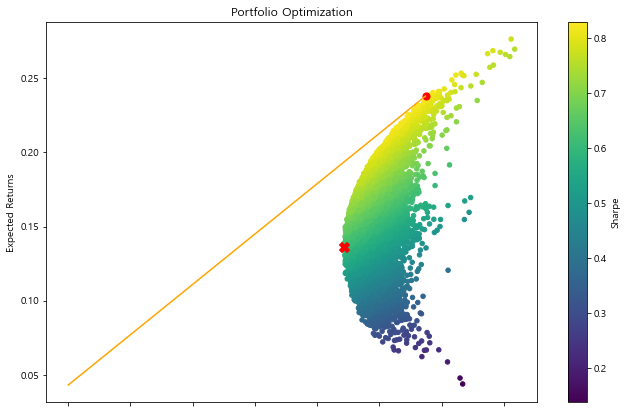

In [97]:
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

# plot

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap = 'viridis', figsize = (11,7))
plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'], c = 'r',  s=50)
plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'], c = 'r', marker = 'X', s=100)

plt.plot([0, max_sharpe['Risk']], [0.043,  max_sharpe['Returns']],color="orange")

plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [98]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차
9716,0.238104,0.287087,0.829378,0.026767,0.276628,0.510495,0.182958,0.003151
